#Cross spectral density (CSD)

Original Code

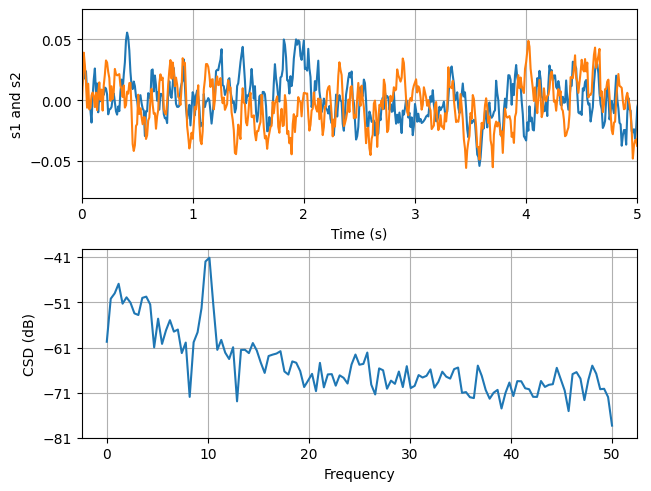

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (dB)')

plt.show()

Modified Code

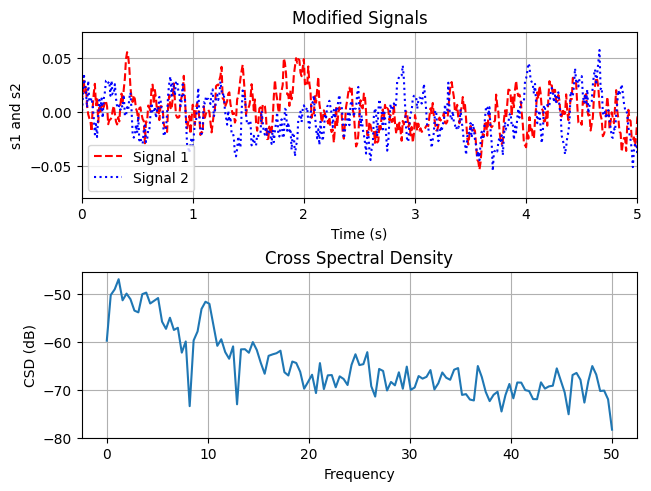

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')

dt = 0.01
t = np.arange(0, 30, dt)

np.random.seed(19680801)

nse1 = np.random.randn(len(t))
nse2 = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt
cnse2 = np.convolve(nse2, r, mode='same') * dt

s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 5 * t) + cnse2  # Changed frequency to 5 Hz

ax1.plot(t, s1, 'r--', label='Signal 1')  # Changed line style and color
ax1.plot(t, s2, 'b:', label='Signal 2')  # Changed line style and color
ax1.set_xlim(0, 5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)
ax1.set_title('Modified Signals')  # Added title
ax1.legend()  # Added legend

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (dB)')
ax2.set_title('Cross Spectral Density')  # Added title

plt.show()


**Comparison and Explanation**

* Frequency Change: Changed the frequency of s2 to 5 Hz. This does not affect the coherence calculation, as it just provides a different signal to compare.
* Line Style and Color: Changed the line style and color for both signals in ax1.plot.
* Titles: Added titles to both subplots to improve clarity.
* Legend: Added a legend to the first subplot to differentiate the signals.
* Plot Appearance: Enhanced the appearance without altering the underlying data processing and calculation steps.

#Bar Label Demo

Original Code

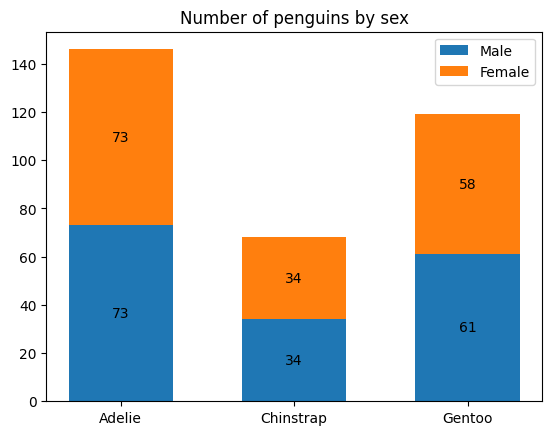

In [ ]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

Modified Code

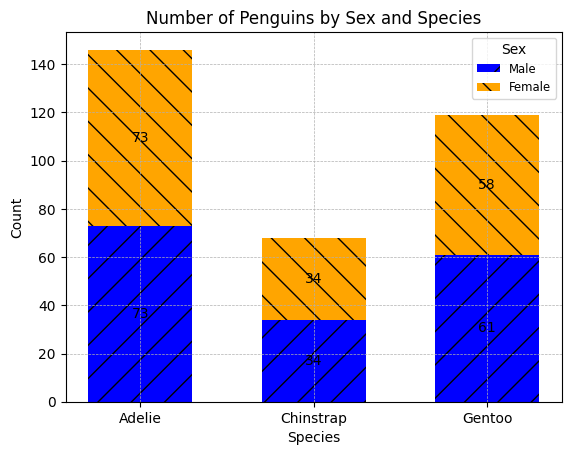

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom,
               color={'Male': 'blue', 'Female': 'orange'}[sex], hatch={'Male': '/', 'Female': '\\'}[sex])
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of Penguins by Sex and Species')
ax.set_xlabel('Species')
ax.set_ylabel('Count')
ax.legend(title='Sex', loc='upper right', fontsize='small')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


**Comparison and Explanation**

* Bar Colors and Hatch Patterns: Added specific colors and hatch patterns to differentiate between Male and Female bars.
* Title: Enhanced the plot title to be more descriptive.
* Axes Labels: Added x-axis and y-axis labels to improve clarity.
* Legend: Customized the legend by adding a title, changing its location, and adjusting the font size.
* Grid: Enabled the grid with dashed lines to make the plot easier to read.